In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(42)
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)
import os
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("/Users/alexanderzayonts/Downloads/data-scientist4-master 4/3. Python Preprocessing/Python Preprocessing - Project Work/data_breast.csv",index_col=False)
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
corr = data.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


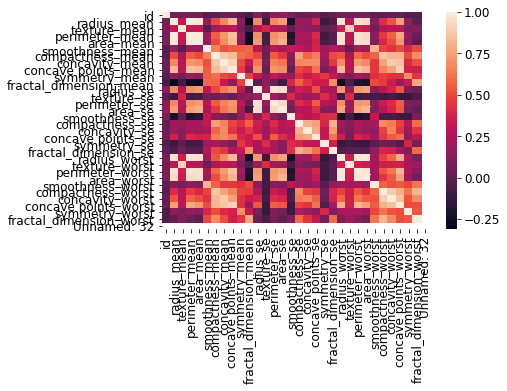

In [6]:
sns.heatmap(corr, annot=False,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [7]:
data.drop(["Unnamed: 32"], axis = 1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
stat_1 = data[data['diagnosis'] == 'M']['radius_mean']
stat_2 = data[data['diagnosis'] == 'B']['radius_mean']

stats.ttest_ind(stat_1, stat_2)

Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

In [10]:
stat_1 = data[data['diagnosis'] == 'M']['perimeter_mean']
stat_2 = data[data['diagnosis'] == 'B']['perimeter_mean']

stats.ttest_ind(stat_1, stat_2)

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})       

In [14]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
data.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_worst': 'concave_points_worst'}, inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [17]:
est = smf.ols('diagnosis ~ radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst', train_set).fit()
est_res = est.summary()
est_res.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.4747,0.296,-4.982,0.000,-2.056,-0.893
radius_mean,-0.2856,0.182,-1.568,0.118,-0.644,0.072
texture_mean,0.0162,0.007,2.175,0.030,0.002,0.031
perimeter_mean,0.0216,0.027,0.801,0.423,-0.031,0.075
area_mean,0.0009,0.000,1.875,0.061,-4.4e-05,0.002
smoothness_mean,-0.2384,2.029,-0.117,0.907,-4.226,3.750
compactness_mean,-3.6787,1.195,-3.080,0.002,-6.027,-1.331
concavity_mean,-0.2485,0.910,-0.273,0.785,-2.038,1.541
concave_points_mean,7.7214,2.013,3.837,0.000,3.766,11.677
radius_worst,0.2524,0.051,4.944,0.000,0.152,0.353


In [18]:
all_x_lm = smf.ols('diagnosis ~ radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst', train_set).fit()
rss = np.sum(all_x_lm.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (data.shape[0] - 18 - 1)))
print("R^2:", all_x_lm.rsquared)

RSS: 25.5623434729715
RSE: 0.21558522243575845
R^2: 0.7593647064136625


In [19]:
all8_x_lm = smf.ols('diagnosis ~ radius_mean + texture_mean  + area_mean + compactness_mean + concave_points_mean + radius_worst + area_worst + smoothness_worst + symmetry_worst', train_set).fit()
rss = np.sum(all8_x_lm.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (data.shape[0] - 9 - 1)))
print("R^2:", all8_x_lm.rsquared)

RSS: 26.38611652577375
RSE: 0.21726102997200597
R^2: 0.7516099842920706


In [20]:
from imblearn.over_sampling import SMOTE


In [142]:
train_features,test_features,trainn_set, testt_set = train_test_split(data.drop(['diagnosis'],axis=1),data['diagnosis'], test_size=0.2, random_state=42)

In [75]:
sm = SMOTE(random_state=42,ratio=1.0)

In [76]:
train_x,value_x,train_y, value_y = train_test_split(train_features,trainn_set,test_size=0.2, random_state=42)

In [77]:
x_train_res,y_train_res = sm.fit_sample(train_x,train_y)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [79]:
clf_rf = RandomForestClassifier(n_estimators=31,random_state=42)
clf_rf.fit(x_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
print ('Validation Results')
print (clf_rf.score(value_x, value_y))
print (recall_score(value_y, clf_rf.predict(value_x)))
print ('\nTest Results')
print (clf_rf.score(test_features, testt_set))
print (recall_score(testt_set, clf_rf.predict(test_features)))

Validation Results
0.9560439560439561
0.9444444444444444

Test Results
0.9649122807017544
0.9302325581395349


In [ ]:
# oversampling gives a better result 0.94444>0.93023

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold

In [279]:
data_X = data.drop(['diagnosis','perimeter_mean','smoothness_mean','concavity_mean','texture_worst','perimeter_worst','compactness_worst','concavity_worst','concave_points_worst','fractal_dimension_worst'],axis=1)
data_Y = data['diagnosis']


In [280]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
def run_cv(X,y,clf_class):

   kf = KFold(n_splits=10,shuffle=True)
   y_pred = y.copy()

   for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    train_x,value_x,train_y, value_y = train_test_split(X_train,y_train,test_size=0.2, random_state=42)
    X_train_res,y_train_res = sm.fit_sample(train_x,train_y)
    clf = clf_class
    clf.fit(X_train_res,y_train_res)
    y_pred[test_index] = clf.predict(X_test)
   return y_pred


In [281]:
run_cv(data_X.as_matrix(),data_Y,clf_rf)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [282]:
def get_proba(X,y,clf_class):

   kf = KFold(n_splits=10,shuffle=True)
   y_pred = y.copy()

   for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    train_x,value_x,train_y, value_y = train_test_split(X_train,y_train,test_size=0.2, random_state=42)
    X_train_res,y_train_res = sm.fit_sample(train_x,train_y)
    clf = clf_class
    clf.fit(X_train_res,y_train_res)
    predictions = clf.predict_proba(X_test)
   return predictions

In [283]:
get_proba(data_X.as_matrix(),data_Y,clf_rf)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0.09677419, 0.90322581],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64516129, 0.35483871],
       [0.93548387, 0.06451613],
       [0.        , 1.        ],
       [0.03225806, 0.96774194],
       [0.96774194, 0.03225806],
       [0.        , 1.        ],
       [0.29032258, 0.70967742],
       [0.96774194, 0.03225806],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.96774194, 0.03225806],
       [1.        , 0.        ],
       [0.03225806, 0.96774194],
       [0.93548387, 0.06451613],
       [0.03225806, 0.96774194],
       [0.96774194, 0.03225806],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.61290323, 0.38709677],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [273]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [286]:
print(accuracy_score(data_Y, run_cv(data_X.as_matrix(),data_Y,clf_rf)))
print(f1_score(data_Y, run_cv(data_X.as_matrix(),data_Y,clf_rf)))
print(precision_score(data_Y, run_cv(data_X.as_matrix(),data_Y,clf_rf)))
print(recall_score(data_Y, run_cv(data_X.as_matrix(),data_Y,clf_rf)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.9595782073813708


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.9330143540669856


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0.9386792452830188


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


0.9339622641509434


In [276]:
from sklearn.metrics import brier_score_loss

In [285]:
print(brier_score_loss(data_Y, run_cv(data_X.as_matrix(),data_Y,clf_rf)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.04745166959578207
